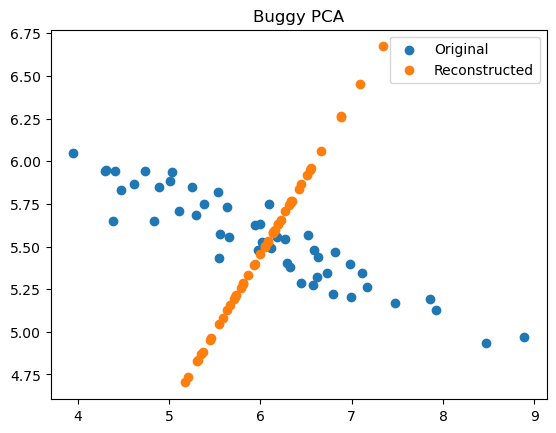

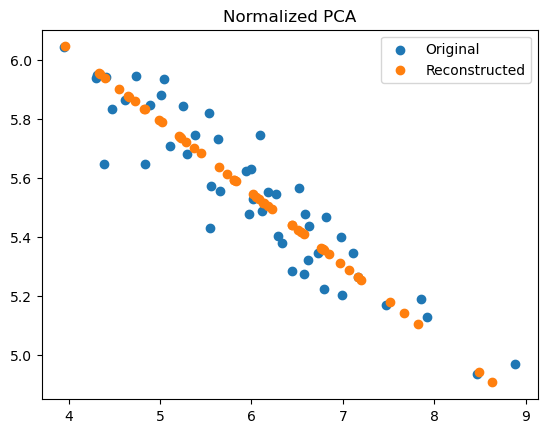

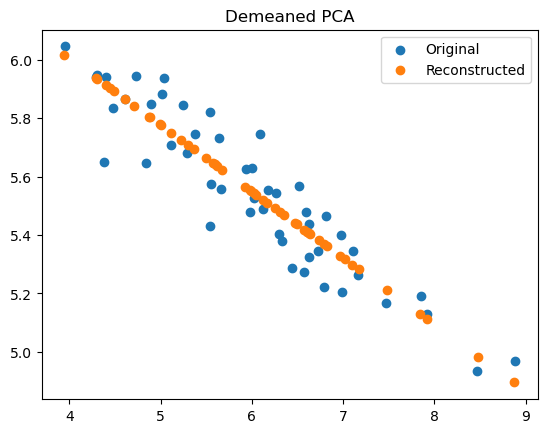

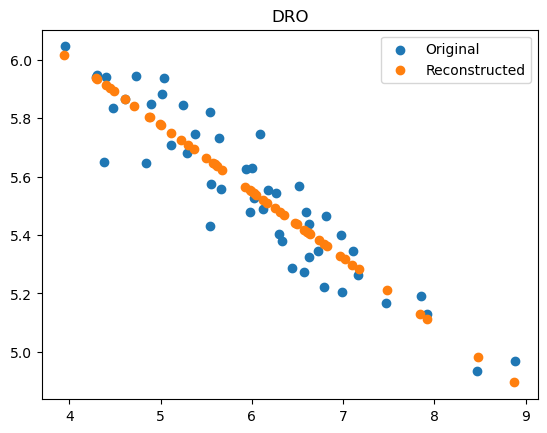

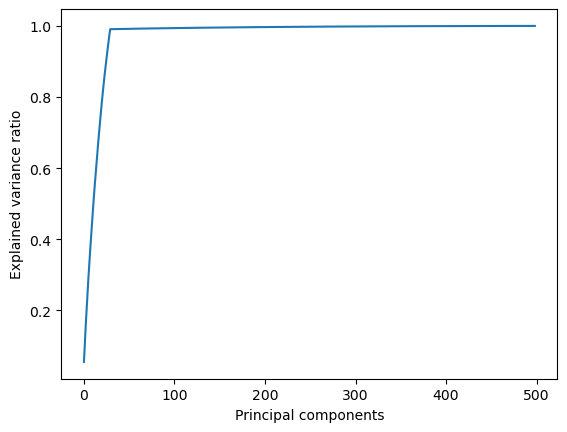

(0, 0.05525815698439401)
(1, 0.10983463280281205)
(2, 0.1592637770787509)
(3, 0.20479127923097243)
(4, 0.25029913923313213)
(5, 0.29457212242833763)
(6, 0.33534686411006026)
(7, 0.3735953331147003)
(8, 0.4117068906474127)
(9, 0.44877041339551804)
(10, 0.48547847788793375)
(11, 0.5208960069032522)
(12, 0.5542822891778706)
(13, 0.586357455569037)
(14, 0.6180386222087131)
(15, 0.6491689297494128)
(16, 0.6795373040282908)
(17, 0.7089766523635183)
(18, 0.7376676818546507)
(19, 0.7653548104172757)
(20, 0.7923553462343694)
(21, 0.8177380674864)
(22, 0.8424915450276214)
(23, 0.8661937992531611)
(24, 0.8887194102399696)
(25, 0.9107551253114191)
(26, 0.9321477850210341)
(27, 0.9531375004000208)
(28, 0.9729082792663495)
(29, 0.9907995625840543)
(30, 0.9908552803173953)
(31, 0.9909100265740173)
(32, 0.9909636980832611)
(33, 0.9910168495845324)
(34, 0.9910697537910289)
(35, 0.9911218718565589)
(36, 0.991173679876276)
(37, 0.99122485228284)
(38, 0.9912758617142076)
(39, 0.9913267008413789)
(40, 0.99

In [107]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data2d = pd.read_csv('data2D.csv')
data1000d = pd.read_csv('data1000D.csv')
data2d = np.array(data2d)
data1000d = np.array(data1000d)

def Buggy_PCA(data, dim):
    U,S, V = np.linalg.svd(data)
    pc = V.T[:, :dim]
    pca_data = np.dot(data, pc)
    r_data = np.dot(pca_data, pc.T)
    error = np.mean(np.sum((data - r_data)**2, axis=1)) 
    return pc, pca_data, r_data, error

def Normalized_PCA(data, dim):
    s_data = (data - np.mean(data, axis=0) ) / (np.std(data - np.mean(data, axis=0) , axis=0))
    U, S, V = np.linalg.svd(s_data)
    pc = V.T[:, :dim] 
    pca_data = np.dot(s_data, pc)
    r_data = np.dot(pca_data, pc.T) *np.std(data - np.mean(data, axis=0), axis=0) + np.mean(data, axis=0) 
    error = np.mean(np.sum((data - r_data)**2, axis=1)) 
    return pc, pca_data, r_data, error

def Demeaned_PCA(data, dim):
    U, S, V = np.linalg.svd(data -np.mean(data, axis=0))
    pc = V.T[:, :dim]
    pca_data = np.dot(data -np.mean(data, axis=0), pc)
    r_data = np.dot(pca_data, pc.T) + np.mean(data, axis=0)
    error = np.mean(np.sum((data - r_data)**2, axis=1)) 
    return pc, pca_data, r_data, error

def DRO(data, dim):
    U, S, V = np.linalg.svd(data - np.mean(data,axis=0))
    A = V[:dim].T
    Z = np.dot(data, A)
    b = np.mean(data,axis=0) - np.dot(np.mean(Z, axis=0), A.T)
    r_data = np.dot(Z-np.mean(Z, axis=0), A.T) + np.mean(data,axis=0)
    error = np.mean(np.sum((data - r_data)**2, axis=1)) 
    return Z, A, b, r_data, error

def Reconstructions(data, r_data, plot_name):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data[:, 0], data[:, 1], label='Original')
    ax.scatter(r_data[:, 0], r_data[:, 1], label='Reconstructed')
    plt.legend()
    plt.title(plot_name)
    plt.show()
    
Reconstructions(data2d, Buggy_PCA(data2d, 1)[2],'Buggy PCA')
Reconstructions(data2d, Normalized_PCA(data2d,1)[2],'Normalized PCA')
Reconstructions(data2d, Demeaned_PCA(data2d,1)[2], 'Demeaned PCA')
Reconstructions(data2d, DRO(data2d,1)[3],'DRO')


pca = PCA()
pca.fit(data1000d)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()


for i in range(50):
    print( (i,np.cumsum(pca.explained_variance_ratio_)[i]))
print('')
print('Reconstruction Errors for data2d')
print(f'Buggy PCA: {Buggy_PCA(data2d, 1)[-1]}.') 
print(f'Noramlized PCA : {Normalized_PCA(data2d, 1)[-1]}.') 
print(f'Demeaned PCA: {Demeaned_PCA(data2d, 1)[-1]}.') 
print(f'DRO: {DRO(data2d,1)[-1]}.') 
print('')
print('Reconstruction Errors for data1000d (All errors are for dim = 30)')
print(f'Buggy PCA: {Buggy_PCA(data1000d, 30)[-1]}.') 
print(f'Noramlized PCA: {Normalized_PCA(data1000d, 30)[-1]}.') 
print(f'Demeaned PCA: {Demeaned_PCA(data1000d, 30)[-1]}.') 
print(f'DRO: {DRO(data1000d, 30)[-1]}.') 